# Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data exploration
This is a synthetic dataset of 100 samples and two variables.
* X is the advertising expediture of a quarter
* y is the sales revenue of that quarter

Based on this dataset, Suppose you plan to spend 5.2 million dollars in advertising next quarter, what is the predicted revenue.

In [ ]:
def make_data(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(1, 7, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x + 5)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    y *= 5
    return x.reshape(-1, 1), y.reshape(-1, 1)

In [ ]:
X, y = make_data()

In [ ]:
print(y.shape)
print(X.shape)

(100, 1)
(100, 1)


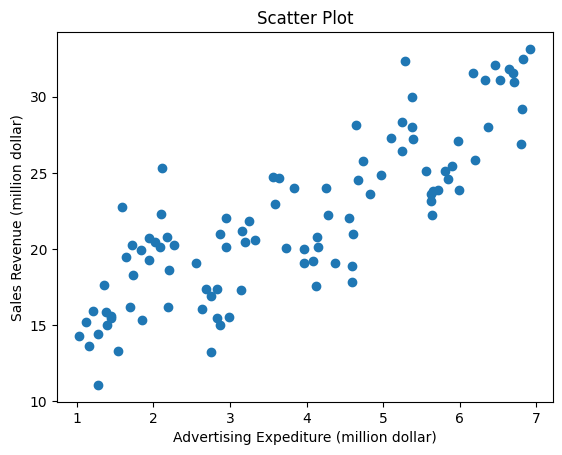

In [ ]:
plt.scatter(X, y)
plt.title("Scatter Plot")
plt.xlabel("Advertising Expediture (million dollar)")
plt.ylabel("Sales Revenue (million dollar)");

## 2. Define cost function $J(\theta)$
Recall that the cost function is defined :
$J\left(\theta_{0}, \theta_{1}\right)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$

In [ ]:
# number of training examples
m = len(y)
print(m)

100


In [ ]:
# adding ones into X
ones = np.ones((m, 1));
X = np.append(ones, X, axis = 1)
print(X.shape)

(100, 2)


In [ ]:
# initializing model parameters
theta_initial = np.zeros((2, 1))
print(theta_initial.shape)

# model hypothesis: h = theta_0 * x_0 + theta_1 * x_1
h = X.dot(theta_initial)

(2, 1)


In [ ]:
h.shape

(100, 1)

In [ ]:
# initializing hyperparameters 0.001
iters = 300;
lr = 0.1;   #learning rate: how big is each step

Text(0, 0.5, 'Sales Revenue (million dollar)')

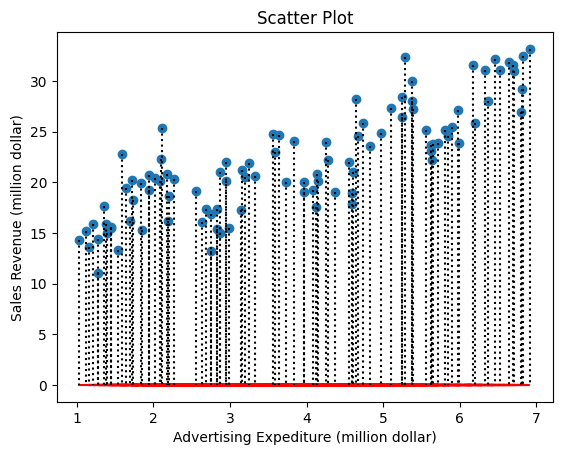

In [ ]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], X.dot(theta_initial).reshape(100,), 'r--')
plt.vlines(X[:,1], y, X.dot(theta_initial), colors='k', linestyles='dotted')

plt.title("Scatter Plot")
plt.xlabel("Advertising Expediture (million dollar)")
plt.ylabel("Sales Revenue (million dollar)")

In [ ]:
def cost_func(X, y, theta):
    m = len(y)
    h = X.dot(theta)
    return np.sum((h - y) ** 2) / (2 * m)

In [ ]:
def cost_func_non_vectorized(X, y, theta):
    m = len(y)
    total_cost = 0
    for i in range(m):
        h_i = X[i].dot(theta)
        error_i = h_i - y[i]
        total_cost += error_i ** 2
    return total_cost / (2 * m)

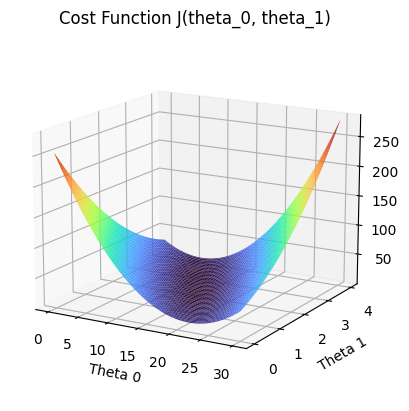

In [ ]:
# visualise the cost function

from mpl_toolkits.mplot3d import Axes3D

# Define range for theta_0 and theta_1
theta_0_vals = np.linspace(0, 30, 100)
theta_1_vals = np.linspace(0, 4, 100)

# Create meshgrid
Theta_0, Theta_1 = np.meshgrid(theta_0_vals, theta_1_vals)

# Calculate cost for each theta_0, theta_1 pair
J_vals = np.zeros_like(Theta_0)
for i in range(Theta_0.shape[0]):
    for j in range(Theta_0.shape[1]):
        theta = np.array([[Theta_0[i, j]], [Theta_1[i, j]]])
        J_vals[i, j] = cost_func(X, y, theta)

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Theta_0, Theta_1, J_vals, cmap='turbo')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.title('Cost Function J(theta_0, theta_1)')
# Set the viewing angle (elevation, azimuthal)
ax.view_init(elev=15, azim=-60)
plt.show()


In [ ]:
# Find the indices of the maximum value in J_vals
max_idx = np.unravel_index(np.argmax(J_vals), J_vals.shape)

# Retrieve the corresponding theta_0 and theta_1 values
theta_0_max = Theta_0[max_idx]
theta_1_max = Theta_1[max_idx]

# Print the results
print("Theta values leading to maximum cost:")
print("Theta 0:", theta_0_max)
print("Theta 1:", theta_1_max)

Theta values leading to maximum cost:
Theta 0: 30.0
Theta 1: 4.0


## 3. Gradient Descent (Additional)
Recall that in gradient descent, we update $\theta$ iteratively until it converges.

$\theta_{0} =\theta_{0}-\alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{0}^{(i)}$

$\theta_{1} =\theta_{1}-\alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{1}^{(i)}$

In [ ]:
print("Shape of the feature matrix X:", X.shape)
print("Shape of the target vector y:", y.shape)
print("Shape of the parameter vector theta:", theta.shape)
print("Shape of the predicted values (X.dot(theta)):", (X.dot(theta)).shape)
print("Shape of the transposed feature matrix X.T:", X.T.shape)

Shape of the feature matrix X: (100, 2)
Shape of the target vector y: (100, 1)
Shape of the parameter vector theta: (2, 1)
Shape of the predicted values (X.dot(theta)): (100, 1)
Shape of the transposed feature matrix X.T: (2, 100)


In [ ]:
# vectorization implementation of gradient descent

def gradient_descent(X, y, theta, lr, iters):
    m = len(y)
    theta_history = []  # To save the theta values at each step

    for i in range(iters):
        h = X.dot(theta)
        gradient = (X.T.dot(h - y)) / m
        theta -= lr * gradient
        # theta = theta - lr * gradient
        cost = cost_func(X, y, theta)
        print(cost)
        theta_history.append(theta.copy())  # Save the current theta value

    return theta, theta_history  # Return the final theta and the history

In [ ]:
theta_optimal, theta_history = gradient_descent(X, y, theta_initial, lr, iters)

191.0419864082717
144.4654111813353
110.0504317393982
84.60194997625501
65.76494879712743
51.80358886831571
41.438393667474344
33.72624801958641
27.971951947649785
23.66303209993182
20.421694977200165
17.969414379320416
16.100830797622518
14.664514099771232
13.548784748226987
12.671263370175465
11.971168279547614
11.403638356115232
10.935548699137136
10.542426520104234
10.20617795962468
9.913412591268711
9.654208447667337
9.4212017318964
9.208915837433032
9.013266750443245
8.831198455088463
8.660414158313108
8.499178139367451
8.346169654434572
8.200375209715393
8.061009115290489
7.927454884664705
7.799221999969623
7.6759140037671445
7.557204940452582
7.442821953035858
7.332532418022474
7.226134426348319
7.123449731737899
7.024318518857071
6.92859551389063
6.836147085664397
6.7468490779237325
6.660585181552197
6.577245705760837
6.496726644313598
6.418928960151948
6.343758031902325
6.2711232205806935
6.200937525740495
6.1331173083684165
6.067582063772709
6.004254232087947
5.9430590372485

In [ ]:
theta_optimal

array([[12.47495442],
       [ 2.47237008]])

Theta at iteration 40: [6.82635558 3.70971708] - Cost: 7.024318518857071
Theta at iteration 60: [8.46247544 3.34471627] - Cost: 5.616804530461379
Theta at iteration 80: [9.62560032 3.09153104] - Cost: 4.9075035814708015
Theta at iteration 100: [10.45160516  2.91202649] - Cost: 4.549838173331402
Theta at iteration 200: [12.10962093  2.55175372] - Cost: 4.1978979373513


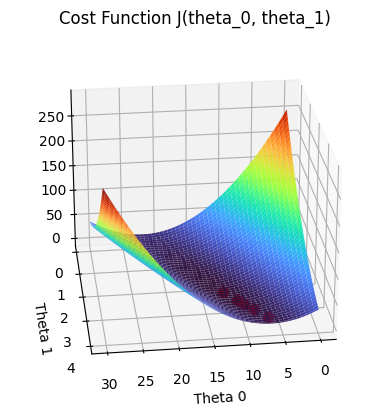

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Theta_0, Theta_1, J_vals, cmap='turbo')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.title('Cost Function J(theta_0, theta_1)')
# Set the viewing angle (elevation, azimuthal)
ax.view_init(elev=25, azim=83)

# Plot specific sets of thetas from theta_history
indices_to_plot = [40, 60, 80, 100, 200]
for idx in indices_to_plot:
    theta_point = theta_history[idx]
    cost_value = cost_func(X, y, theta_point)
    print(f"Theta at iteration {idx}: {theta_point.flatten()} - Cost: {cost_value}")
    ax.scatter(theta_point[0], theta_point[1], cost_func(X, y, theta_point), color='red', s=50)

plt.show()

Text(0, 0.5, 'Sales Revenue (million dollar)')

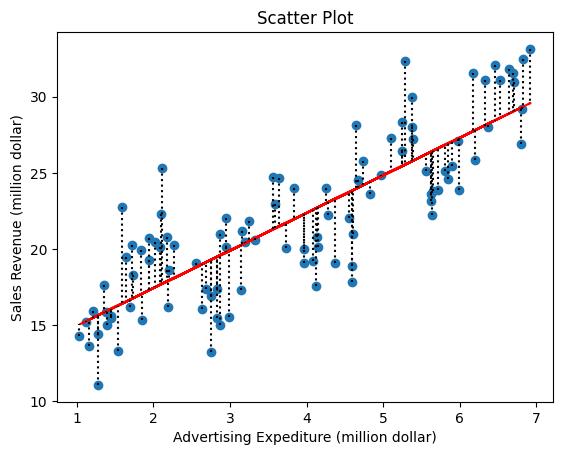

In [ ]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], X.dot(theta_optimal).reshape(100,), 'r--')
plt.vlines(X[:,1], y, X.dot(theta_optimal), colors='k', linestyles='dotted')

plt.title("Scatter Plot")
plt.xlabel("Advertising Expediture (million dollar)")
plt.ylabel("Sales Revenue (million dollar)")

## 4. Using learned parameters to predict
Now, we use learned theta to predict next quarter's revenue.

In [ ]:
X_next = np.array([1, 5.2])
predict = X_next.dot(theta_optimal)[0]
print(predict)

25.331278834751117
